# STEP 5: Plot the Veery observations by month

First thing first – let’s load your stored variables and import
libraries.

In [1]:
%store -r

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>In the imports cell, we’ve included some packages that you will need.
Add imports for packages that will help you:</p>
<ol type="1">
<li>Make interactive maps with vector data</li>
</ol></div></div>

In [7]:
# Get month names
import calendar

# Libraries for Dynamic mapping
import cartopy.crs as ccrs
import hvplot.pandas
import panel as pn

In [10]:
!pip install geoviews

  Obtaining dependency information for geoviews from https://files.pythonhosted.org/packages/fe/c1/11add578ab3a2f3d9210d651a2c7ccb4a8cfec3e9cc2f4a00cbcd58af699/geoviews-1.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for bokeh<3.6.0,>=3.5.0 from https://files.pythonhosted.org/packages/75/47/c3971a7a011c8d80a0c7e40c7f51e6a6bb2a186b46a5ec2d2ade49d6b970/bokeh-3.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.2 from https://files.pythonhosted.org/packages/99/e6/d11966962b1aa515f5586d3907ad019f4b812c04e4546cc19ebf62b5178e/contourpy-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for panel>=1.0.0 from https://files.pythonhosted.org/packages/99/87/5a4ec3b1a013474dd44edecbfd8602631163bb0a2351dbc4080aa988f754/panel-1.5.1-py3-none-any.whl.meta

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
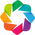

In [25]:
import geoviews as gv
import geoviews.feature as gf
gv.extension('bokeh', 'matplotlib')

In [30]:
ecoregions_gdf

,name,area,geometry
ecoregion,,,
0,Adelie Land tundra,0.038948,"POLYGON ((17090104.083 -10646152.188, 17100906..."
1,Admiralty Islands lowland rain forests,0.170599,"MULTIPOLYGON (((16461836.873 -254248.259, 1644..."
2,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((3391149.749 4336064.109, 33985..."
3,Afghan Mountains semi-desert,1.355536,"MULTIPOLYGON (((7369001.698 4093509.259, 73168..."
4,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-17912546.290 8050475.591, -17..."
...,...,...,...
842,Sulawesi lowland rain forests,9.422097,"MULTIPOLYGON (((14113374.546 501721.962, 14128..."
843,East African montane forests,5.010930,"MULTIPOLYGON (((4275410.576 -149750.128, 42781..."
844,Eastern Arc forests,0.890325,"MULTIPOLYGON (((4302962.150 -537675.265, 43111..."


### Create a simplified `GeoDataFrame` for plotting

Plotting larger files can be time consuming. The code below will
streamline plotting with `hvplot` by simplifying the geometry,
projecting it to a Mercator projection that is compatible with
`geoviews`, and cropping off areas in the Arctic.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Simplify ecoregion data</div></div><div class="callout-body-container callout-body"><p>Download and save ecoregion boundaries from the EPA:</p>
<ol type="1">
<li>Simplify the ecoregions with <code>.simplify(.05)</code>, and save
it back to the <code>geometry</code> column.</li>
<li>Change the Coordinate Reference System (CRS) to Mercator with
<code>.to_crs(ccrs.Mercator())</code></li>
<li>Use the plotting code that is already in the cell to check that the
plotting runs quickly (less than a minute) and looks the way you want,
making sure to change <code>gdf</code> to YOUR <code>GeoDataFrame</code>
name.</li>
</ol></div></div>

In [31]:
# Simplify the geometry to speed up processing
ecoregions_gdf.geometry = ecoregions_gdf.simplify(
    .05, preserve_topology=False)

# Change the CRS to Mercator for mapping
ecoregions_gdf = ecoregions_gdf.to_crs(ccrs.Mercator())

In [33]:
ecoregions_gdf

,name,area,geometry
ecoregion,,,
0,Adelie Land tundra,0.038948,"POLYGON ((17090104.083 -10646152.188, 17100906..."
1,Admiralty Islands lowland rain forests,0.170599,"MULTIPOLYGON (((16461836.873 -254248.259, 1644..."
2,Aegean and Western Turkey sclerophyllous and m...,13.844952,"MULTIPOLYGON (((3391149.749 4336064.109, 33985..."
3,Afghan Mountains semi-desert,1.355536,"MULTIPOLYGON (((7369001.698 4093509.259, 73168..."
4,Ahklun and Kilbuck Upland Tundra,8.196573,"MULTIPOLYGON (((-17912546.290 8050475.591, -17..."
...,...,...,...
842,Sulawesi lowland rain forests,9.422097,"MULTIPOLYGON (((14113374.546 501721.962, 14128..."
843,East African montane forests,5.010930,"MULTIPOLYGON (((4275410.576 -149750.128, 42781..."
844,Eastern Arc forests,0.890325,"MULTIPOLYGON (((4302962.150 -537675.265, 43111..."


In [36]:
# Check that the plot runs
ecoregions_gdf.hvplot(geo=True, crs=ccrs.Mercator())

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/formatters.py", line 974, in __call__
    return method(include=include, exclude=exclude)
  File "/opt/conda/lib/python3.10/site-packages/holoviews/core/dimension.py", line 1287, in _repr_mimebundle_
    return Store.render(self)
  File "/opt/conda/lib/python3.10/site-packages/holoviews/core/options.py", line 1423, in render
    ret = hook(obj)
  File "/opt/conda/lib/python3.10/site-packages/holoviews/ipython/display_hooks.py", line 280, in pprint_display
    return display(obj, raw_output=True)
  File "/opt/conda/lib/python3.10/site-packages/holoviews/ipython/display_hooks.py", line 248, in display
    output = element_display(obj)
  File "/opt/conda/lib/python3.10/site-packages/holoviews/ipython/display_hooks.py", line 142, in wrapped
    mimebu

:Polygons   [Longitude,Latitude]

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Map migration over time</div></div><div class="callout-body-container callout-body"><ol type="1">
<li>If applicable, replace any variable names with the names you defined
previously.</li>
<li>Replace <code>column_name_used_for_ecoregion_color</code> and
<code>column_name_used_for_slider</code> with the column names you wish
to use.</li>
<li>Customize your plot with your choice of title, tile source, color
map, and size.</li>
</ol>
<div data-__quarto_custom="true" data-__quarto_custom_type="Callout"
data-__quarto_custom_context="Block" data-__quarto_custom_id="3">
<div data-__quarto_custom_scaffold="true">

</div>
<div data-__quarto_custom_scaffold="true">
<p>Your plot will probably still change months very slowly in your
Jupyter notebook, because it calculates each month’s plot as needed.
Open up the saved HTML file to see faster performance!</p>
</div>
</div></div></div>

In [37]:
# Join the occurrences with the plotting GeoDataFrame
occurrence_gdf = ecoregions_gdf.join(occurrence_df)

# Get the plot bounds so they don't change with the slider
xmin, ymin, xmax, ymax = occurrence_gdf.total_bounds

# Define the slider widget
slider = pn.widgets.DiscreteSlider(
    name='month', 
    options={calendar.month_name[i]: i for i in range(1, 13)}
)

# Plot occurrence by ecoregion and month
migration_plot = (
    occurrence_gdf
    .hvplot(
        c='norm_occurrences',
        groupby='month',
        # Use background tiles
        geo=True, crs=ccrs.Mercator(), tiles='CartoLight',
        title="Veery migration",
        xlim=(xmin, xmax), ylim=(ymin, ymax),
        frame_height=600,
        colorbar=False,
        widgets={'month': slider},
        widget_location='bottom'
    )
)

# Save the plot
migration_plot.save('migration.html', embed=True)

# Show the plot
migration_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_37708/634087927.py", line 31, in <module>
    migration_plot.save('migration.html', embed=True)
  File "/opt/conda/lib/python3.10/site-packages/panel/viewable.py", line 985, in save
    location : boolean or panel.io.location.Location
  File "/opt/conda/lib/python3.10/site-packages/panel/io/save.py", line 260, in save
    model = doc
  File "/opt/conda/lib/python3.10/site-packages/panel/layout/base.py", line 305, in get_root
    op_heights.append(properties['max_height'])
  File "/opt/conda/lib/python3.10/site-packages/panel/viewable.py", line 658, in get_root
    comm: pyviz_comms.Comm
  File "/opt/conda/lib/python3.10/site-packages/panel/layout/base.py", line 173, in _get_model
  File "/opt/conda/lib/python3.10/site-packages/panel/layout/base.py", line 155, in _get_obje

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Fix the month labels</div></div><div class="callout-body-container callout-body"><p>Notice that the <code>month</code> slider displays numbers instead of
the month name. Use <code>pn.widgets.DiscreteSlider()</code> with the
<code>options=</code> parameter set to give the months names. You might
want to try asking ChatGPT how to do this, or look at the documentation
for <code>pn.widgets.DiscreteSlider()</code>. This is pretty tricky!</p></div></div>